In [135]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random
import time  
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [136]:
data =pd.read_csv('D://vscode//data//iris.csv')
display(data)

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
...,...,...,...
145,5.2,2.3,virginica
146,5.0,1.9,virginica
147,5.2,2.0,virginica
148,5.4,2.3,virginica


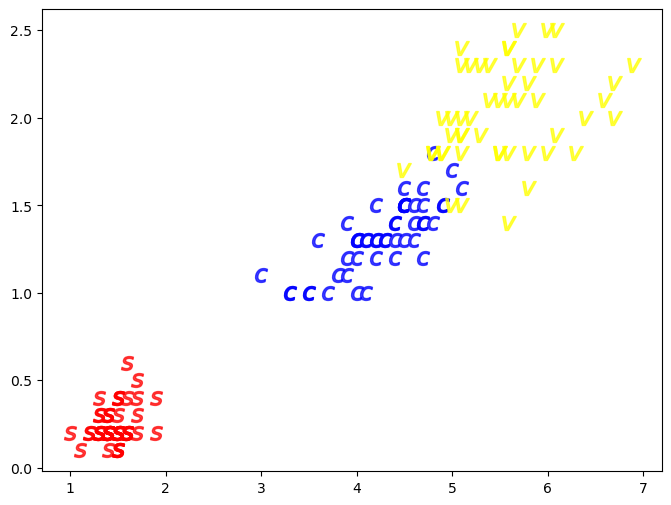

In [137]:
markers = {
    'setosa': {'symbol': 's', 'color': 'red'},
    'versicolor': {'symbol': 'c', 'color': 'blue'},
    'virginica': {'symbol': 'v', 'color': 'yellow'}
}


plt.figure(figsize=(8, 6))

for t, props in markers.items():
    subset = data[data['species'] == t]
    plt.scatter(subset['petal_length'], subset['petal_width'], label=f'Type {t}', s=100, c=props['color'], alpha=0.7, marker=f'${props["symbol"]}$')

In [138]:
X_train, X_test, y_train, y_test = train_test_split(
    data[['petal_length', 'petal_width']], data['species'], test_size=0.3,random_state=3
)

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

y_pred = logistic_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

Accuracy: 0.98
Confusion Matrix:
[[17  0  0]
 [ 0 13  1]
 [ 0  0 14]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.93      0.96        14
   virginica       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [139]:
X_train, X_test, y_train, y_test = train_test_split(
    data[['petal_length', 'petal_width']], data['species'], test_size=0.3
)

# 多分类逻辑回归
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

# 模型评估
y_pred = logistic_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 绘制决策边界函数
def plot_decision_boundary(data, model):
    # 定义网格范围
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.1),
        np.arange(y_min, y_max, 0.1)
    )

    # 预测网格点类别
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 绘制决策边界
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    scatter = plt.scatter(data[:, 0], data[:, 1], c=data[:, 2], edgecolors='k', cmap='coolwarm', s=50)
    plt.colorbar(scatter)
    plt.xlabel('petal_length', fontsize=12)
    plt.ylabel('petal_width', fontsize=12)
    plt.title('Logistic Regression Decision Boundary (Multiclass)', fontsize=14)
    plt.grid(True)

# 绘图
plt.figure(figsize=(8, 6))
plot_decision_boundary(data[:,0:1],data[:,2], logistic_reg)
plt.show()

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.92      0.96        12
   virginica       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



InvalidIndexError: (slice(None, None, None), slice(0, 1, None))

<Figure size 800x600 with 0 Axes>